In [85]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error



In [86]:
data = pd.read_csv('Ecommerce_Customers.csv')

In [87]:
data

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\r\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\r\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\r\nCobbborough,...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\r\nPort Jason, OH 22070-...",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\r\nPort Jacobville, PR...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,4483 Jones Motorway Suite 872\r\nLake Jamiefur...,Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\r\nWest Richard, CA ...",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,0787 Andrews Ranch Apt. 633\r\nSouth Chadburgh...,Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\r\nBrendachester, ...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510


In [88]:
data.isnull().any()

Email                   False
Address                 False
Avatar                  False
Avg. Session Length     False
Time on App             False
Time on Website         False
Length of Membership    False
Yearly Amount Spent     False
dtype: bool

In [89]:
data.count()

Email                   500
Address                 500
Avatar                  500
Avg. Session Length     500
Time on App             500
Time on Website         500
Length of Membership    500
Yearly Amount Spent     500
dtype: int64

In [90]:
data.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


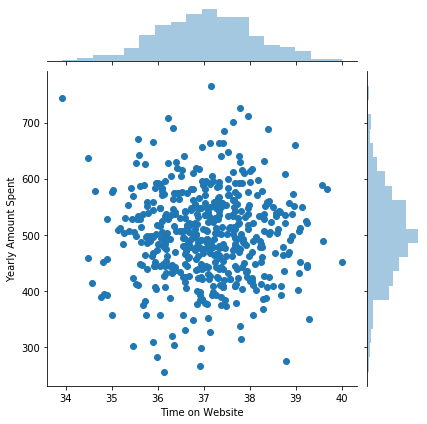

In [92]:
sns.jointplot(x='Time on Website' , y='Yearly Amount Spent' , data=data)

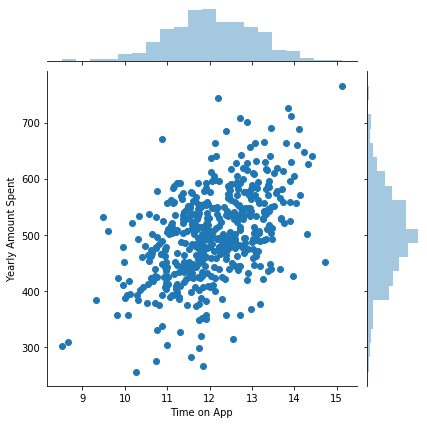

In [93]:
sns.jointplot(x='Time on App' , y='Yearly Amount Spent' , data=data)

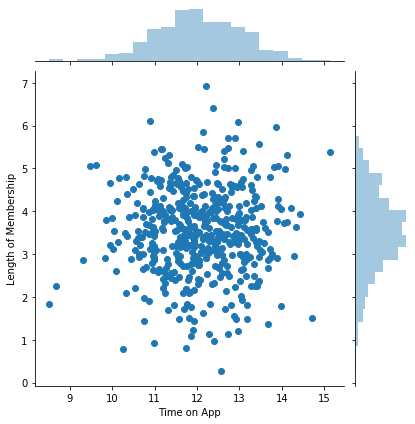

In [94]:
sns.jointplot(x='Time on App' , y='Length of Membership' , data=data)

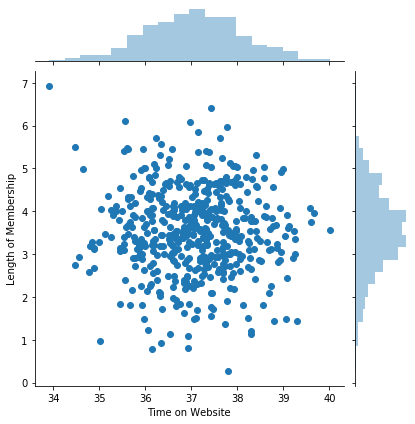

In [95]:
sns.jointplot(x='Time on Website' , y='Length of Membership' , data=data)

In [96]:
data['Time on Website'].corr(data['Length of Membership'])

-0.04758181883946131

In [97]:
data['Time on App'].corr(data['Length of Membership'])

0.02914256313615854

In [98]:
data.corr()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


In [99]:
mask =np.zeros_like(data.corr())
indent=np.triu_indices_from(mask)
mask[indent]=True
mask

array([[1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1.],
       [0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 1.]])

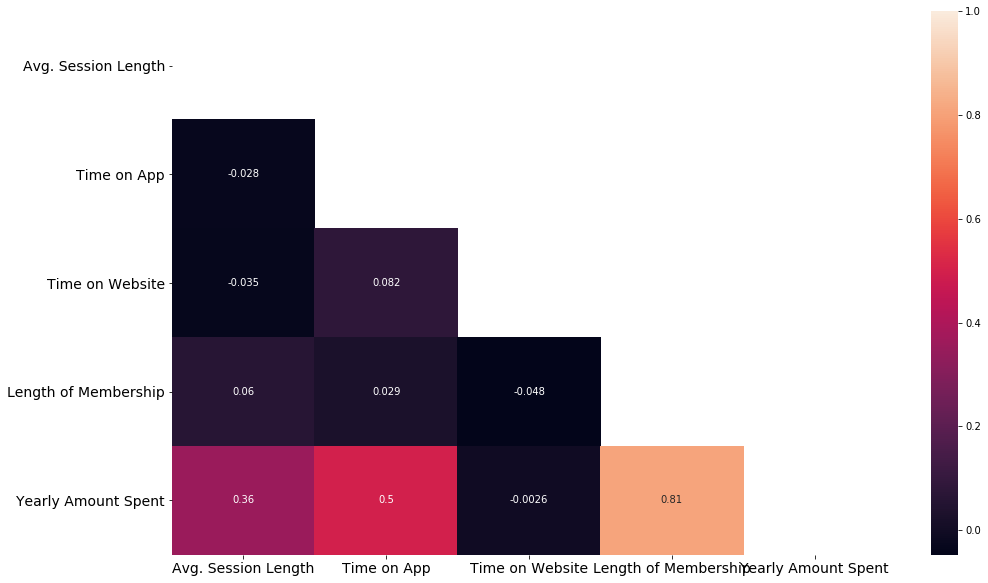

In [100]:
plt.figure(figsize=[16,10])
sns.heatmap(data.corr(),annot=True,mask=mask, annot_kws={"size":10})
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

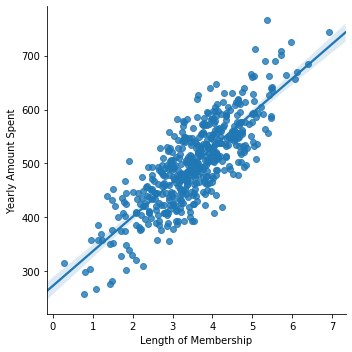

In [101]:
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=data)

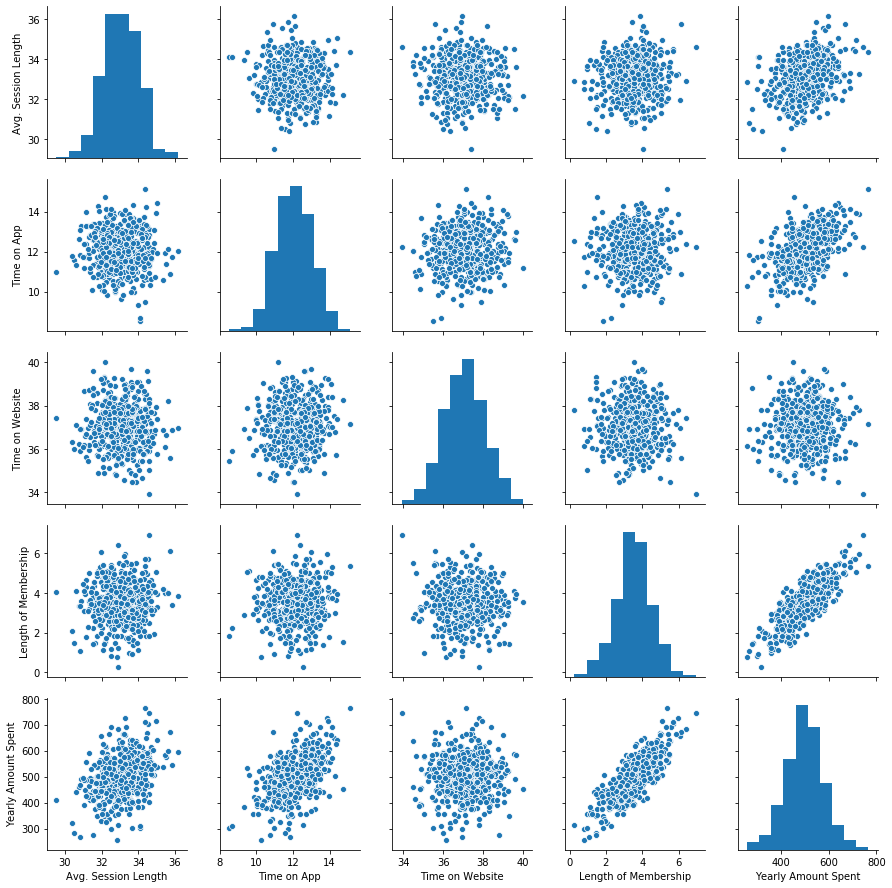

In [102]:
sns.pairplot(data)
plt.show()

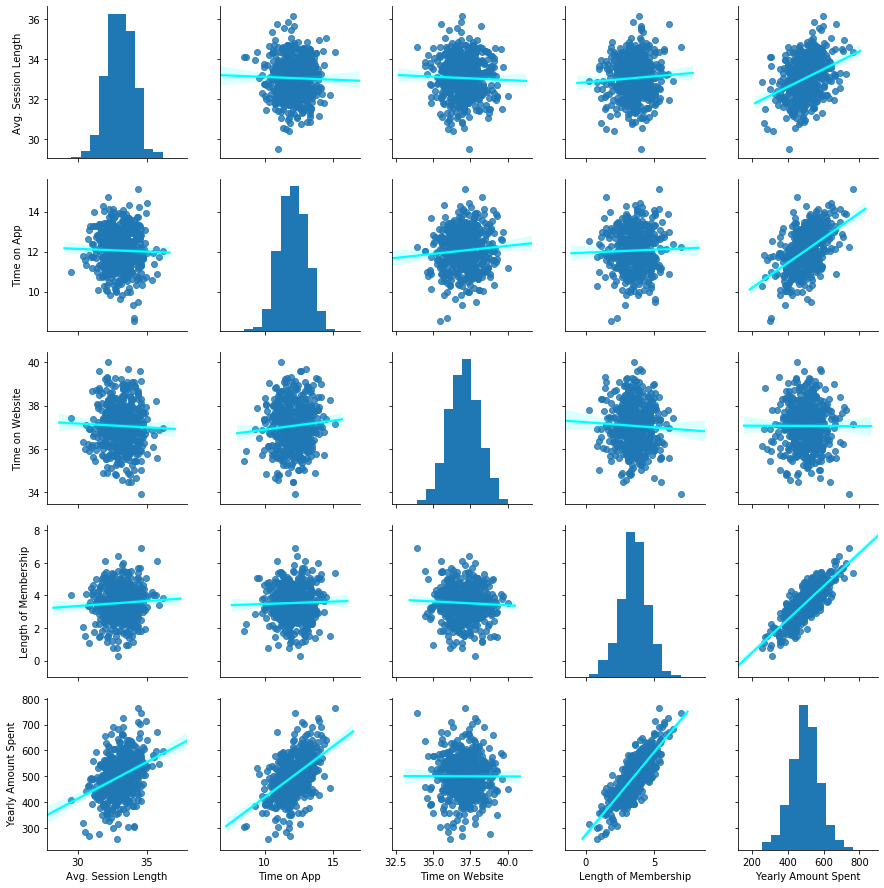

In [103]:
sns.pairplot(data , kind='reg' , plot_kws={'line_kws':{'color':'cyan'}})
plt.show()

In [104]:
Yearly_Amount_spend=data['Yearly Amount Spent']
Time_Desc=data.drop(['Yearly Amount Spent','Address','Avatar','Email'],axis=1)
X_train , X_test , y_train , y_test=train_test_split(Time_Desc,Yearly_Amount_spend, test_size=0.2 , random_state=10)

In [105]:
X_train.shape

(400, 4)

In [106]:
data.shape

(500, 8)

In [107]:
y_train.shape

(400,)

In [108]:
regr=LinearRegression()
regr.fit(X_train,y_train)
print(f'regression score for train data set : {regr.score(X_train,y_train)}')
print(f'regression score for test data set : {regr.score(X_test,y_test)}')
print('Intercept : ', regr.intercept_)
len(regr.coef_)
coeifficent=pd.DataFrame(data=regr.coef_ , index=Time_Desc.columns)
coeifficent.columns=['coef']
coeifficent

regression score for train data set : 0.9826925563799327
regression score for test data set : 0.9882929974541987
Intercept :  -1063.1760775809707


,coef
Avg. Session Length,25.844102
Time on App,38.679412
Time on Website,0.644409
Length of Membership,61.815473


In [109]:
data['Yearly Amount Spent'].skew()

0.034790184115234546

In [110]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [111]:
X_inc_const= sm.add_constant(X_train)
model=sm.OLS(y_train,X_inc_const)
results = model.fit()
print(results.summary())

                             OLS Regression Results                            
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.983
Model:                             OLS   Adj. R-squared:                  0.983
Method:                  Least Squares   F-statistic:                     5607.
Date:                 Thu, 26 Mar 2020   Prob (F-statistic):               0.00
Time:                         15:32:58   Log-Likelihood:                -1495.4
No. Observations:                  400   AIC:                             3001.
Df Residuals:                      395   BIC:                             3021.
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -

C:\Users\Sukhmeet\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [112]:
pd.DataFrame({"coef":results.params , "pvalue":round(results.pvalues,3)})

,coef,pvalue
const,-1063.176078,0.000
Avg. Session Length,25.844102,0.000
Time on App,38.679412,0.000
Time on Website,0.644409,0.205
Length of Membership,61.815473,0.000


In [113]:
X_inc_const.columns

Index(['const', 'Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership'],
      dtype='object')

In [114]:
vif_list=[variance_inflation_factor(exog=X_inc_const.values,exog_idx=i) for i in range(len(X_inc_const.columns))]

In [115]:
vif_list

[2632.961141126333, 1.0050752105634164, 1.011915037029026, 1.0141544497395987, 1.00637497045064]

In [116]:
pd.DataFrame({"coef":results.params , "pvalue":round(results.pvalues,3),"VIF":vif_list})

,coef,pvalue,VIF
const,-1063.176078,0.000,2632.961141
Avg. Session Length,25.844102,0.000,1.005075
Time on App,38.679412,0.000,1.011915
Time on Website,0.644409,0.205,1.014154
Length of Membership,61.815473,0.000,1.006375


In [117]:
X_inc_const=sm.add_constant(X_train)
model=sm.OLS(y_train,X_inc_const)
results=model.fit()

org_coef = pd.DataFrame({'coef': results.params, 'p-value': round(results.pvalues, 3)})

print('BIC is', results.bic)
print('r-squared is', results.rsquared)

BIC is 3020.738144168154
r-squared is 0.9826925563799329


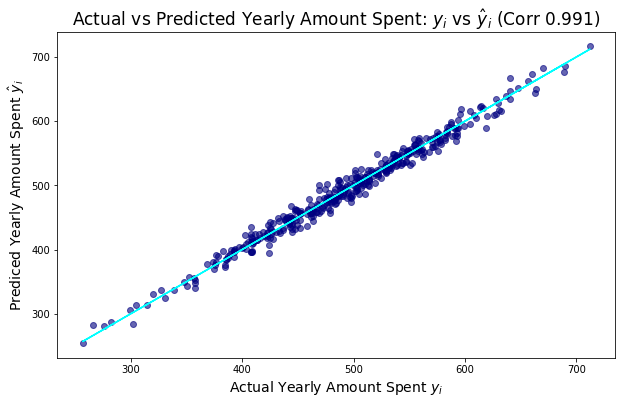

In [118]:
Yearly_Amount_spend=data['Yearly Amount Spent']
Time_Desc=data.drop(['Yearly Amount Spent','Address','Avatar','Email'],axis=1)

X_train , X_test , y_train , y_test=train_test_split(Time_Desc,Yearly_Amount_spend, test_size=0.2 , random_state=10)

X_inc_const=sm.add_constant(X_train)
model=sm.OLS(y_train,X_inc_const)
results=model.fit()


plt.figure(figsize=[10,6])
corr=round(y_train.corr(results.fittedvalues),3)
plt.scatter(x=y_train, y=results.fittedvalues, c='navy', alpha=0.6)
plt.plot(y_train, y_train, color='cyan')

plt.xlabel('Actual Yearly Amount Spent $y _i$', fontsize=14)
plt.ylabel('Prediced Yearly Amount Spent $\hat y _i$', fontsize=14)
plt.title(f'Actual vs Predicted Yearly Amount Spent: $y _i$ vs $\hat y_i$ (Corr {corr})', fontsize=17)
plt.show()

Text(0, 0.5, 'Predicted Y')

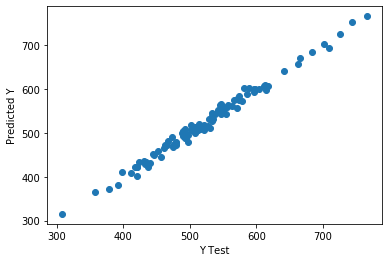

In [124]:
prediction =regr.predict(X_test)
plt.scatter(y_test,prediction)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [128]:
print('MSE :'," ", mean_squared_error(y_test,prediction))


MSE :   79.36379602481226
